# This jupyter notebook is mainly used for capstone project.

In [1]:
!pip install geopy
!pip install folium
print("Installed!")
!pip install geocoder
import geocoder # import geocoder

Installed!


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library


print('Libraries imported.')

Libraries imported.


In [3]:
from ibm_botocore.client import Config
import ibm_boto3

cos_credentials={
  "apikey": "CkoSMRHA9hx_lCyJuaR5Eld_kxb7FgH3lyUFWeahnYtu",
  "endpoints": "https://control.cloud-object-storage.cloud.ibm.com/v2/endpoints",
  "iam_apikey_description": "Auto-generated for key 4e0b5fb0-5b11-4edd-9a30-96d2a4f1dcfb",
  "iam_apikey_name": "CourseraCapstone_TA",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Manager",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/2dd28c64035248e3b8a949043a692afb::serviceid:ServiceId-f21c331d-5eee-4480-8a75-f02fb490c1ef",
  "resource_instance_id": "crn:v1:bluemix:public:cloud-object-storage:global:a/2dd28c64035248e3b8a949043a692afb:fb336493-86e3-4bab-adce-7f3854f60e0f::"
}
auth_endpoint = 'https://iam.bluemix.net/oidc/token'
service_endpoint = 'https://s3-api.us-geo.objectstorage.softlayer.net'
cos = ibm_boto3.client('s3',
                         ibm_api_key_id=cos_credentials['apikey'],
                         ibm_service_instance_id=cos_credentials['resource_instance_id'],
                         ibm_auth_endpoint=auth_endpoint,
                         config=Config(signature_version='oauth'),
                         endpoint_url=service_endpoint)

for bucket in cos.list_buckets()['Buckets']:
    print(bucket['Name'])
    
res=cos.get_object(Bucket='capstonecoursera-donotdelete-pr-3pe6lrbdli8u9x',Key='Yangon Districts.csv')['Body']
print('File Downloaded')

df_data_1 = pd.read_csv(res)
df_data_1.head()

capstonecoursera-donotdelete-pr-3pe6lrbdli8u9x
cloud-object-storage-dsx-cos-standard-lxn
datascience-donotdelete-pr-wmupjngf1haejn
daxweatherproject-donotdelete-pr-yvomh9viicoafc
fashionproject-donotdelete-pr-svg81srh5ylajn
mydatascienceproject-donotdelete-pr-0vrhufjiubcgob
project-donotdelete-pr-s4xcgg3rgczulb
pythoncourse4-donotdelete-pr-d8fwvvk4xifals
pythontesting-donotdelete-pr-up8vzirhasppt8
pythonvisualizationproject-donotdelete-pr-vevw4luopjeypl
week3assignment-donotdelete-pr-ruufrrdcmxh7xv
week5-donotdelete-pr-8ueeijtdgb1dna
week6assignment-donotdelete-pr-k7vg9rrrzn6unq
week6machinelearningassignment-donotdelete-pr-9wzgi2m73ncrcf
File Downloaded


,District,Name
0,Western District,Ahlon
1,Western District,Bahan
2,Western District,Dagon
3,Western District,Hlaing
4,Western District,Kamayut


In [4]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Yangon, Myanmar'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords

In [5]:
addresses = df_data_1['Name'] 
coords = [ get_latilong(address) for address in addresses.tolist() ]

In [6]:
# define the dataframe columns
column_names = ['District', 'Name', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighbors = pd.DataFrame(columns=column_names)

district = df_data_1['District']
name = df_data_1['Name']
latitude = None
longitude = None

for data in range(0, len(district)):
    dt = district[data]
    nm = name[data]
    latitude = coords[data][0]
    longitude = coords[data][1]
    neighbors = neighbors.append({ 'District':dt,'Name':nm,'Latitude': latitude,'Longitude': longitude}, ignore_index=True)


In [7]:
neighbors

,District,Name,Latitude,Longitude
0,Western District,Ahlon,16.793446,96.142020
1,Western District,Bahan,16.813150,96.155870
2,Western District,Dagon,16.805280,96.156110
3,Western District,Hlaing,17.383330,95.833330
4,Western District,Kamayut,16.830000,96.124440
5,Western District,Kyauktada,16.773030,96.161600
6,Western District,Kyimyindaing,16.805830,96.122220
7,Western District,Lanmadaw,16.779810,96.145970
8,Western District,Latha,16.779580,96.151870
9,Western District,Mayangon,16.870000,96.139440


In [8]:
neighbors.loc[(neighbors.Name == 'Hlaing'), ['Latitude','Longitude']] = ['16.8508','96.1156']
neighbors.loc[(neighbors.Name == 'Sanchaung'), ['Latitude','Longitude']] = ['16.8062','96.1341']
neighbors.loc[(neighbors.Name == 'Dawbon'), ['Latitude','Longitude']] = ['16.7827','96.1858']
neighbors.loc[(neighbors.Name == 'Thingangyun'), ['Latitude','Longitude']] = ['16.8248','96.2004']
neighbors.loc[(neighbors.Name == 'Insein'), ['Latitude','Longitude']] = ['16.9042','96.0997']
neighbors.loc[(neighbors.Name == 'Mingaladon'), ['Latitude','Longitude']] = ['16.9969','96.1421']
#neighbors.loc[(neighbors.Name == 'Hlaingthaya'), ['Latitude','Longitude']] = ['16.51','96.04']
neighbors.loc[(neighbors.Name == 'Thanlyin'), ['Latitude','Longitude']] = ['16.7588','96.2482']

In [9]:
neighbors

,District,Name,Latitude,Longitude
0,Western District,Ahlon,16.7934,96.142
1,Western District,Bahan,16.8132,96.1559
2,Western District,Dagon,16.8053,96.1561
3,Western District,Hlaing,16.8508,96.1156
4,Western District,Kamayut,16.83,96.1244
5,Western District,Kyauktada,16.773,96.1616
6,Western District,Kyimyindaing,16.8058,96.1222
7,Western District,Lanmadaw,16.7798,96.146
8,Western District,Latha,16.7796,96.1519
9,Western District,Mayangon,16.87,96.1394


# Mapping with yangon districts


In [10]:
geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode('Yangon')
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinate of yangon are {}, {}.'.format(latitude, longitude))


The geographical coordinate of yangon are 16.7967129, 96.1609916.


In [11]:
map_yangon = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, name in zip(neighbors['Latitude'], neighbors['Longitude'], neighbors['Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_yangon)  
    
map_yangon

In [12]:
label

# Exploring the Data using foursquare

In [13]:
CLIENT_ID = 'FQEUN0E5DMAGQHNZL2OYDKCUNY5BL3UIPCHD4AQIFKSRO5IU' #  Foursquare ID
CLIENT_SECRET = 'DI4CNDNLQHMMYASUA4QTXGS20B51HWHH4QYWOC2U3E4UMTSC' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: FQEUN0E5DMAGQHNZL2OYDKCUNY5BL3UIPCHD4AQIFKSRO5IU
CLIENT_SECRET:DI4CNDNLQHMMYASUA4QTXGS20B51HWHH4QYWOC2U3E4UMTSC


# Exploring the first District

In [14]:
neighbors.loc[0, 'Name']

'Ahlon'

In [15]:
neighborhood_latitude = neighbors.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighbors.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighbors.loc[0, 'Name'] # neighborhood name
#neighborhood_name = "New Dagon East" # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Ahlon are 16.793446470141106, 96.14202025958322.


In [16]:
search_query = 'venues'
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=FQEUN0E5DMAGQHNZL2OYDKCUNY5BL3UIPCHD4AQIFKSRO5IU&client_secret=DI4CNDNLQHMMYASUA4QTXGS20B51HWHH4QYWOC2U3E4UMTSC&v=20180605&ll=16.793446470141106,96.14202025958322&radius=500&limit=100'

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edbda4d77af03001baa8986'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Dagon',
  'headerFullLocation': 'Dagon, Yangon',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 16.797946474641112,
    'lng': 96.1467119507187},
   'sw': {'lat': 16.7889464656411, 'lng': 96.13732856844774}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f5ef9afe4b0028cf9df9eac',
       'name': 'The Corriander Leaf: Indian Fine-Dining',
       'location': {'address': '12 Ahlon Road',
        'crossStreet': 'Ahlone Road',
        'lat': 16.79305773403347,
        'lng': 96.14240150466034,
        'labeledLatLngs

In [18]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,The Corriander Leaf: Indian Fine-Dining,4f5ef9afe4b0028cf9df9eac,Indian Restaurant,16.793058,96.142402
1,Music Box,4d724d50d976236a4b380479,Karaoke Bar,16.792706,96.140994
2,Feel Myanmar Food,4ef0333bb63454a9fd496def,Asian Restaurant,16.790701,96.143595
3,Black Canyon,4f225aa2e4b067a324ad71bd,Café,16.793298,96.141927
4,The Roof Bar,54b7bbbe498e3b57e51e3204,Bar,16.792580,96.141885
5,Mya Kan Thar (Ownn) Burmese Restaurant,52ca44cf498ee3bb894fb25d,Restaurant,16.793062,96.144777
6,Burbrit Taproom,5a6c907635f983424423f5f6,Beer Bar,16.791412,96.139558
7,Hong Bao Dim Sum and Cantonese Cuisine,590d2b5d0f013c66cea96b09,Cantonese Restaurant,16.792071,96.140311
8,Taste,4e073b4f6284d9ee92d3f18c,Café,16.790855,96.144062
9,My Garden,4e2030c018a88345f03d703b,Asian Restaurant,16.793671,96.142119


In [20]:
#fix the column names

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues


,name,id,categories,lat,lng
0,The Corriander Leaf: Indian Fine-Dining,4f5ef9afe4b0028cf9df9eac,Indian Restaurant,16.793058,96.142402
1,Music Box,4d724d50d976236a4b380479,Karaoke Bar,16.792706,96.140994
2,Feel Myanmar Food,4ef0333bb63454a9fd496def,Asian Restaurant,16.790701,96.143595
3,Black Canyon,4f225aa2e4b067a324ad71bd,Café,16.793298,96.141927
4,The Roof Bar,54b7bbbe498e3b57e51e3204,Bar,16.792580,96.141885
5,Mya Kan Thar (Ownn) Burmese Restaurant,52ca44cf498ee3bb894fb25d,Restaurant,16.793062,96.144777
6,Burbrit Taproom,5a6c907635f983424423f5f6,Beer Bar,16.791412,96.139558
7,Hong Bao Dim Sum and Cantonese Cuisine,590d2b5d0f013c66cea96b09,Cantonese Restaurant,16.792071,96.140311
8,Taste,4e073b4f6284d9ee92d3f18c,Café,16.790855,96.144062
9,My Garden,4e2030c018a88345f03d703b,Asian Restaurant,16.793671,96.142119


# Other Districts

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Let's Collect the data

In [22]:
yangon_venues = getNearbyVenues(names=neighbors['Name'],
                                   latitudes=neighbors['Latitude'],
                                   longitudes=neighbors['Longitude']
                                  )

Ahlon
Bahan
Dagon
Hlaing
Kamayut
Kyauktada
Kyimyindaing
Lanmadaw
Latha
Mayangon
Pabedan
Sanchaung
Botataung
Dagon Seikkan
Dawbon
Mingala Taungnyunt
New Dagon East
New Dagon North
New Dagon South
North Okkalapa
Pazundaung
South Okkalapa
Tamwe
Thaketa
Thingangyun
Yankin
Dala
Seikkyi Kanaungto
Insein
Hlaingthaya
Mingaladon
Shwepyitha
Thanlyin


In [23]:
print(yangon_venues.shape)
yangon_venues.head()

(305, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ahlon,16.7934,96.142,The Corriander Leaf: Indian Fine-Dining,16.793058,96.142402,Indian Restaurant
1,Ahlon,16.7934,96.142,Music Box,16.792706,96.140994,Karaoke Bar
2,Ahlon,16.7934,96.142,Feel Myanmar Food,16.790701,96.143595,Asian Restaurant
3,Ahlon,16.7934,96.142,Black Canyon,16.793298,96.141927,Café
4,Ahlon,16.7934,96.142,The Roof Bar,16.792580,96.141885,Bar


In [24]:
yangon_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ahlon,30,30,30,30,30,30
Bahan,18,18,18,18,18,18
Botataung,6,6,6,6,6,6
Dagon,15,15,15,15,15,15
Dagon Seikkan,19,19,19,19,19,19
Hlaing,2,2,2,2,2,2
Insein,3,3,3,3,3,3
Kamayut,1,1,1,1,1,1
Kyauktada,33,33,33,33,33,33


In [25]:
print('There are {} uniques categories.'.format(len(yangon_venues['Venue Category'].unique())))

There are 78 uniques categories.


## Checking how many distinct venue categories we have


# Analyzing the Districts


In [26]:
# one hot encoding
yangon_onehot = pd.get_dummies(yangon_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
yangon_onehot['Neighborhood'] = yangon_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [yangon_onehot.columns[-1]] + list(yangon_onehot.columns[:-1])
yangon_onehot = yangon_onehot[fixed_columns]

yangon_onehot.head()

,Neighborhood,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Boarding House,Boat or Ferry,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Cafeteria,Café,Cantonese Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Diner,Donut Shop,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant,Furniture / Home Store,Gift Shop,Gym,Gym / Fitness Center,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Lounge,Market,Movie Theater,Moving Target,Multiplex,Night Market,Nightclub,Noodle House,Optical Shop,Park,Pizza Place,Platform,Ramen Restaurant,Restaurant,Road,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Snack Place,Spa,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Train Station,Video Store,Whisky Bar
0,Ahlon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ahlon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ahlon,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ahlon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ahlon,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
yangon_onehot.shape

(305, 79)

In [28]:
yangon_grouped = yangon_onehot.groupby('Neighborhood').mean().reset_index()
yangon_grouped


,Neighborhood,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Boarding House,Boat or Ferry,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Station,Cafeteria,Café,Cantonese Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Diner,Donut Shop,Electronics Store,Entertainment Service,Fast Food Restaurant,French Restaurant,Furniture / Home Store,Gift Shop,Gym,Gym / Fitness Center,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Korean Restaurant,Lounge,Market,Movie Theater,Moving Target,Multiplex,Night Market,Nightclub,Noodle House,Optical Shop,Park,Pizza Place,Platform,Ramen Restaurant,Restaurant,Road,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Snack Place,Spa,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Train Station,Video Store,Whisky Bar
0,Ahlon,0.000000,0.166667,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.033333,0.100000,0.033333,0.033333,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.0,0.000000,0.000000,0.033333,0.000000,0.066667,0.000000,0.000000,0.000000,0.033333,0.066667,0.0,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.033333,0.000000,0.000000,0.000000,0.000000,0.0,0.033333,0.100000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.0,0.000000,0.000000
1,Bahan,0.000000,0.111111,0.055556,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.055556,0.000000,0.055556,0.000000,0.055556,0.0,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.055556,0.000000,0.0,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.055556,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055556
2,Botataung,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.0,0.0,0.000000,0.000000,0.000000,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,Dagon,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.066667,0.066667,0.000000,0.000000,0.0,0.000000,0.133333,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.000000,0.0,0.000000,0.066667,0.000000,0.000000,0.066667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,Dagon Seikkan,0.052632,0.052632,0.000000,0.000000,0.000000,0.157895,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.157895,0.000000,0.105263,0.000000,0.000000,0.0,0.00,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.052632,0.000000,0.0

# Let's see each neighborhood along with the top 5 most common venues


In [29]:
num_top_venues = 5

for hood in yangon_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = yangon_grouped[yangon_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ahlon----
              venue  freq
0  Asian Restaurant  0.17
1        Restaurant  0.10
2   Thai Restaurant  0.10
3              Café  0.10
4             Hotel  0.07


----Bahan----
              venue  freq
0  Asian Restaurant  0.11
1               Spa  0.11
2        Whisky Bar  0.06
3   Bubble Tea Shop  0.06
4      Noodle House  0.06


----Botataung----
                venue  freq
0  Chinese Restaurant  0.17
1          Restaurant  0.17
2           Gift Shop  0.17
3       Boat or Ferry  0.17
4  Seafood Restaurant  0.17


----Dagon----
                   venue  freq
0                  Hotel  0.20
1    Japanese Restaurant  0.13
2            Pizza Place  0.07
3  Entertainment Service  0.07
4      Hotpot Restaurant  0.07


----Dagon Seikkan----
                venue  freq
0                Café  0.16
1                 Bar  0.16
2  Chinese Restaurant  0.11
3               Hotel  0.11
4         Art Gallery  0.05


----Hlaing----
           venue  freq
0  Train Station   0.5
1          Di

# Putting into dataframe

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = yangon_grouped['Neighborhood']

for ind in np.arange(yangon_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(yangon_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahlon,Asian Restaurant,Restaurant,Thai Restaurant,Café,Hotel,Indian Restaurant,Gym / Fitness Center,Ice Cream Shop,Karaoke Bar,Chinese Restaurant
1,Bahan,Asian Restaurant,Spa,Whisky Bar,Noodle House,Athletics & Sports,Bakery,Bubble Tea Shop,Burger Joint,Burrito Place,Café
2,Botataung,Chinese Restaurant,Seafood Restaurant,Gift Shop,Burmese Restaurant,Restaurant,Boat or Ferry,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store
3,Dagon,Hotel,Japanese Restaurant,Burger Joint,Hotel Pool,Hotpot Restaurant,Entertainment Service,Market,Café,Pizza Place,Burmese Restaurant
4,Dagon Seikkan,Bar,Café,Hotel,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Deli / Bodega,Gift Shop,Hostel,Restaurant


In [32]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahlon,Asian Restaurant,Restaurant,Thai Restaurant,Café,Hotel,Indian Restaurant,Gym / Fitness Center,Ice Cream Shop,Karaoke Bar,Chinese Restaurant
1,Bahan,Asian Restaurant,Spa,Whisky Bar,Noodle House,Athletics & Sports,Bakery,Bubble Tea Shop,Burger Joint,Burrito Place,Café
2,Botataung,Chinese Restaurant,Seafood Restaurant,Gift Shop,Burmese Restaurant,Restaurant,Boat or Ferry,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store
3,Dagon,Hotel,Japanese Restaurant,Burger Joint,Hotel Pool,Hotpot Restaurant,Entertainment Service,Market,Café,Pizza Place,Burmese Restaurant
4,Dagon Seikkan,Bar,Café,Hotel,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Deli / Bodega,Gift Shop,Hostel,Restaurant
5,Hlaing,Diner,Train Station,Whisky Bar,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store
6,Insein,Department Store,Supermarket,Whisky Bar,Diner,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega
7,Kamayut,Furniture / Home Store,Whisky Bar,Donut Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Diner
8,Kyauktada,Hotel,Bar,Café,Sushi Restaurant,Chinese Restaurant,Burger Joint,Restaurant,Buffet,Hostel,Electronics Store
9,Kyimyindaing,Night Market,Market,Whisky Bar,Hostel,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store


# Using Machine Learning for Clustering Neighborhoods
For clustering, K-means method will be applied. To be able to select the optimal number of clusters, the silhouette score will be used.

First, let's find out the optimal number of clusters. For that, we will create a graph of the silhouette scores.

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

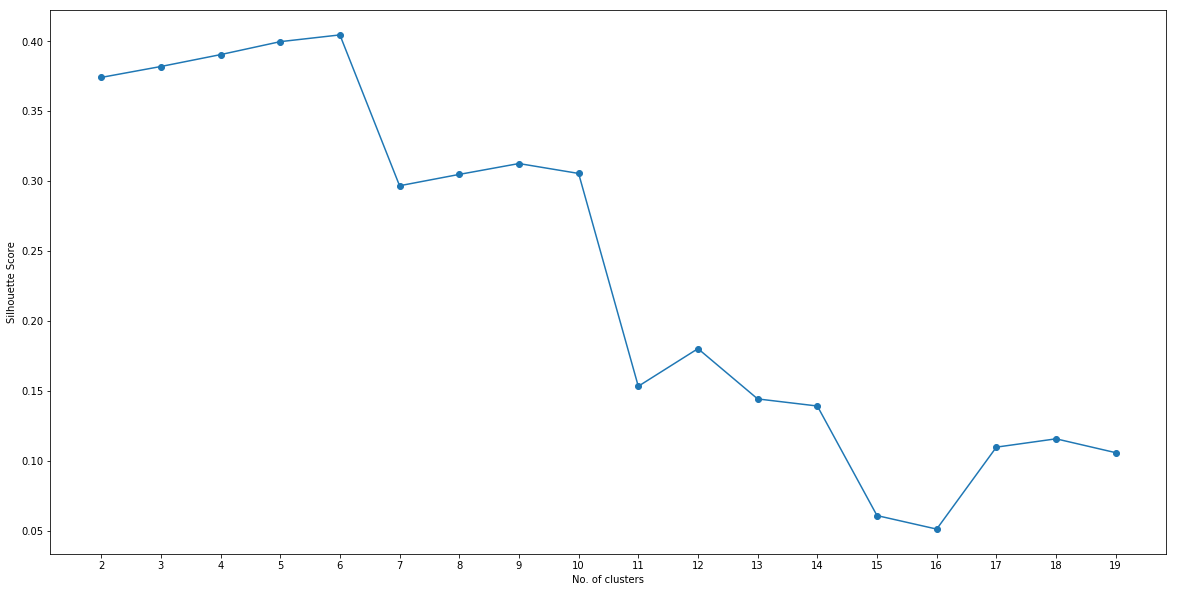

In [34]:
max_range = 20

yangon_grouped_clustering = yangon_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = yangon_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

plot(max_range, scores, "No. of clusters", "Silhouette Score")


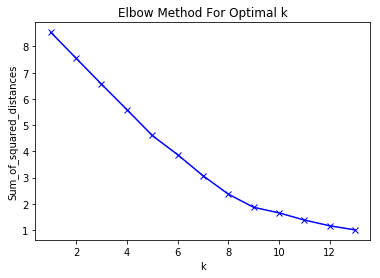

In [35]:
Sum_of_squared_distances = []
K = range(1,14)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(yangon_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()    

In [36]:
kclusters = 6

yangon_grouped_clustering = yangon_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(yangon_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0], dtype=int32)

In [37]:
neighbors.rename(columns={'Name':'Neighborhood'}, inplace=True)
neighbors.head()


,District,Neighborhood,Latitude,Longitude
0,Western District,Ahlon,16.7934,96.142
1,Western District,Bahan,16.8132,96.1559
2,Western District,Dagon,16.8053,96.1561
3,Western District,Hlaing,16.8508,96.1156
4,Western District,Kamayut,16.83,96.1244


In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#neighborhoods_venues_sorted['Cluster Labels'] = neighborhoods_venues_sorted['Cluster Labels'].astype(int)
yangon_merged = neighbors

# merge yangon_grouped with yangon_data to add latitude/longitude for each neighborhood
yangon_merged = yangon_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

yangon_merged

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Western District,Ahlon,16.7934,96.142,0.0,Asian Restaurant,Restaurant,Thai Restaurant,Café,Hotel,Indian Restaurant,Gym / Fitness Center,Ice Cream Shop,Karaoke Bar,Chinese Restaurant
1,Western District,Bahan,16.8132,96.1559,0.0,Asian Restaurant,Spa,Whisky Bar,Noodle House,Athletics & Sports,Bakery,Bubble Tea Shop,Burger Joint,Burrito Place,Café
2,Western District,Dagon,16.8053,96.1561,0.0,Hotel,Japanese Restaurant,Burger Joint,Hotel Pool,Hotpot Restaurant,Entertainment Service,Market,Café,Pizza Place,Burmese Restaurant
3,Western District,Hlaing,16.8508,96.1156,0.0,Diner,Train Station,Whisky Bar,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store
4,Western District,Kamayut,16.83,96.1244,3.0,Furniture / Home Store,Whisky Bar,Donut Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Diner
5,Western District,Kyauktada,16.773,96.1616,0.0,Hotel,Bar,Café,Sushi Restaurant,Chinese Restaurant,Burger Joint,Restaurant,Buffet,Hostel,Electronics Store
6,Western District,Kyimyindaing,16.8058,96.1222,0.0,Night Market,Market,Whisky Bar,Hostel,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store
7,Western District,Lanmadaw,16.7798,96.146,0.0,Hotel,Multiplex,Hostel,Supermarket,Shopping Mall,Japanese Restaurant,Bubble Tea Shop,Ice Cream Shop,Restaurant,Boarding House
8,Western District,Latha,16.7796,96.1519,0.0,Café,Thai Restaurant,Cocktail Bar,Optical Shop,Hotel,Shopping Mall,Coffee Shop,Donut Shop,Movie Theater,Boarding House
9,Western District,Mayangon,16.87,96.1394,0.0,Hotel,Chinese Restaurant,Shopping Mall,Café,Breakfast Spot,Seafood Restaurant,Gym,Thai Restaurant,Bar,Diner


In [39]:
neighborhoods_venues_sorted[neighborhoods_venues_sorted['Neighborhood'] == "Insein"]

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,0,Insein,Department Store,Supermarket,Whisky Bar,Diner,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega


In [40]:
yangon_merged.dropna(inplace = True)
#toronto_merged
yangon_merged['Cluster Labels'] = yangon_merged['Cluster Labels'].astype(int)


In [41]:
yangon_merged['Cluster Labels'].unique()

array([0, 3, 4, 1, 5, 2])

In [42]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(yangon_merged['Latitude'], yangon_merged['Longitude'], yangon_merged['Neighborhood'], yangon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
yangon_merged.loc[yangon_merged['Cluster Labels'] == 0, yangon_merged.columns[[0] + list(range(5, yangon_merged.shape[1]))]]


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Western District,Asian Restaurant,Restaurant,Thai Restaurant,Café,Hotel,Indian Restaurant,Gym / Fitness Center,Ice Cream Shop,Karaoke Bar,Chinese Restaurant
1,Western District,Asian Restaurant,Spa,Whisky Bar,Noodle House,Athletics & Sports,Bakery,Bubble Tea Shop,Burger Joint,Burrito Place,Café
2,Western District,Hotel,Japanese Restaurant,Burger Joint,Hotel Pool,Hotpot Restaurant,Entertainment Service,Market,Café,Pizza Place,Burmese Restaurant
3,Western District,Diner,Train Station,Whisky Bar,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store
5,Western District,Hotel,Bar,Café,Sushi Restaurant,Chinese Restaurant,Burger Joint,Restaurant,Buffet,Hostel,Electronics Store
6,Western District,Night Market,Market,Whisky Bar,Hostel,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store
7,Western District,Hotel,Multiplex,Hostel,Supermarket,Shopping Mall,Japanese Restaurant,Bubble Tea Shop,Ice Cream Shop,Restaurant,Boarding House
8,Western District,Café,Thai Restaurant,Cocktail Bar,Optical Shop,Hotel,Shopping Mall,Coffee Shop,Donut Shop,Movie Theater,Boarding House
9,Western District,Hotel,Chinese Restaurant,Shopping Mall,Café,Breakfast Spot,Seafood Restaurant,Gym,Thai Restaurant,Bar,Diner
10,Western District,Hotel,Café,Restaurant,Movie Theater,Burmese Restaurant,Hostel,Hotel Bar,Hotpot Restaurant,Indian Restaurant,Coffee Shop


In [44]:
yangon_merged.loc[yangon_merged['Cluster Labels'] == 1, yangon_merged.columns[[0] + list(range(5, yangon_merged.shape[1]))]]


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Eastern District,Bus Station,Whisky Bar,Cantonese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Diner


In [45]:
yangon_merged.loc[yangon_merged['Cluster Labels'] == 2, yangon_merged.columns[[0] + list(range(5, yangon_merged.shape[1]))]]


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Northern District,Brewery,Whisky Bar,Cantonese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Diner


In [46]:
yangon_merged.loc[yangon_merged['Cluster Labels'] == 3, yangon_merged.columns[[0] + list(range(5, yangon_merged.shape[1]))]]


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Western District,Furniture / Home Store,Whisky Bar,Donut Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Diner


In [47]:
yangon_merged.loc[yangon_merged['Cluster Labels'] == 4, yangon_merged.columns[[0] + list(range(5, yangon_merged.shape[1]))]]


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Eastern District,Platform,Whisky Bar,Café,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store


In [48]:
yangon_merged.loc[yangon_merged['Cluster Labels'] == 5, yangon_merged.columns[[0] + list(range(5, yangon_merged.shape[1]))]]


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Eastern District,Cantonese Restaurant,Whisky Bar,Donut Shop,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Diner
